In [1]:
%reset -f
import sys
# sys.path.append("/home/jose/Documents/Maestria/Codigo/OTI/build/")
import Calc_Cable as cab
import pyoti.sparse as oti
import numpy as np

%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator

In [2]:
#Reacciones en 0
def Rx_Ry(l,h,L0,A0,E,w,F,s,cargas,order,nbases):
    cargas[0][0] = F
    cargas[0][1] = s
    #convertir adimensionales
    gamma,delta,beta,Psi,Sigmas = cab.param_adim(l,h,L0,A0,E,w,cargas)

    #calcular las incognitas gi fi
    gi_0, fi_0 = 0.3, 0.4 #valores iniciales para iterar en newton
    gi_fi = cab.calc_gi_fi(order,nbases,gamma,delta,beta,Psi,Sigmas,gi_0,fi_0)
    Rx_Ry = gi_fi*w*L0
    return(Rx_Ry)

In [3]:
# punto x,y de la carga
def x_y(l,h,L0,A0,E,w,F,s,cargas,order,nbases):
    cargas[0][0] = F
    cargas[0][1] = s
    
    #convertir adimensionales
    gamma,delta,beta,Psi,Sigmas = cab.param_adim(l,h,L0,A0,E,w,cargas)

    #calcular las incognitas gi fi
    gi_0, fi_0 = 0.3, 0.4 #valores iniciales para iterar en newton
    gi_fi = cab.calc_gi_fi(order,nbases,gamma,delta,beta,Psi,Sigmas,gi_0,fi_0)
    xi_eta_tau = cab.solu(gi_fi[0],gi_fi[1],beta,Psi,Sigmas,Sigmas[1],1)
    x_y = oti.zeros((2,1),nbases=nbases,order=order)
    x_y[0,0] = xi_eta_tau[0]*L0
    x_y[1,0] = xi_eta_tau[1]*L0
    return(x_y)

In [4]:
def plot(x,y,order, xlabel,legend):
    mpl.rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 12}) 
    mpl.rc('text', usetex=True)
    plt.plot(x,y, label= "Order " + str(order))
#     plt.yscale('log')
    plt.legend(loc=legend,fontsize=12)
    plt.ylabel('Relative error')
    plt.xlabel(xlabel)
    plt.grid(True)
    

In [5]:
def f(func,param_f):
    if func == "Rx":
        X = Rx_Ry(*param_f)[0]
    elif func == "x_y":
        X = x_y(*param_f)
    return(X)

In [6]:
def error_graph(param,func,porc_max=0,paso=0,zoom=False,zoom_exp=0,zoom_0_x=0,legend="lower left", 
                xmult=None,figsize=(5,4)):

    #Configuracion de los parámetros
    plt.figure(figsize=figsize)
    
    xlabel = r'$\frac{{\Delta {{{0}}}}}{{{0}}} \, [\%]$'.format(param)
    l,h,L0,A0,E,w,cargas = cab.leer_entradas("Irvine_1")
    cargas = cargas.astype(object)
    F = cargas[0][0]
    s = cargas[0][1]

    var = [l,h,L0,A0,E,w,F,s]
    var_str =["l","h","L_0","A_0","E","w","v_1","s"]
    var_index = var_str.index(param)

    # arreglo del delta como porcentaje
    if zoom==False:
        a= np.arange(1,porc_max,paso)/100
    else:
        a=10.**(np.arange(zoom_exp,0))
        param = param + "_zoom"
    b=-np.flip(a)
    porc = np.concatenate((b,[0],a))
    Delta_h = porc*var[var_index]

    # Perturbación
    nbases = 1
    order = 10
    e1 = oti.e(nbases, order=order)
    var[var_index] = var[var_index] + e1
    param_f = [var[0],var[1],var[2],var[3],var[4],var[5],var[6],var[7],cargas,order,nbases]
    
    X = f(func,param_f)
       
    #Calculo del error
    error_rel = np.zeros(len(Delta_h))
    for o in [1, 2, 5, 10]:
        X_t = X.truncate([[1, o + 1]])
        j = 0
        for ht in Delta_h:
            param_f_ht = param_f.copy()
            param_f_ht[var_index] = param_f_ht[var_index] + ht
            param_f_ht[9] = o
            X_deltah_oti = f(func,param_f_ht)
            X_taylor = X_t.rom_eval([1],[ht])
            error_rel[j] = abs((oti.norm(X_deltah_oti).real - oti.norm(X_taylor).real))/oti.norm(X_deltah_oti).real
            j+=1
        plot(porc*100,error_rel,o,xlabel,legend)
    
    plt.ylim(-10e-17,10e-1)
    if zoom==True:
        plt.xscale('symlog',linthresh=zoom_0_x)
    plt.yscale('symlog',linthresh=1e-16, linscale=1)
    if func == "Rx":
        plt.ylabel(r'Relative error in  $R_x$')
    else:
        plt.ylabel(r'Relative error in $\mathbf{p}(s_1)$')
        
    if xmult is not None:
        
        ax = plt.gca()
        plt.minorticks_on()
        
        ax.xaxis.set_major_locator(MultipleLocator(xmult[0]))
        ax.xaxis.set_minor_locator(MultipleLocator(xmult[1]))

        plt.grid(which='major',color='#CCCCCC', linewidth=0.5)
        
        plt.grid(which='minor',color='#EEEEEE')
    plt.tight_layout()

<IPython.core.display.Javascript object>


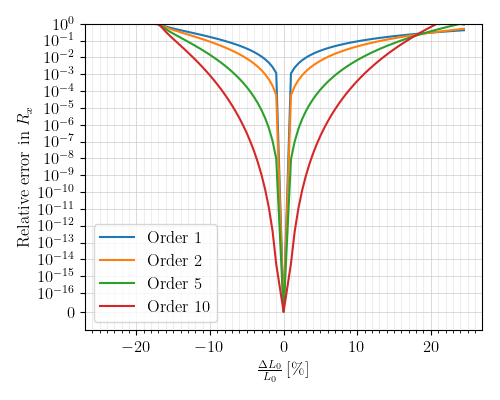

No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.


In [7]:
#ERROR Rx vs % Delta_L0 entre -15% y 15%

#Escoger parámetro "l","h","L_0","A_0","E","w","F","s"
p="L_0"
#Escoger funcion "Rx", "x_y"
func="Rx"

# plt.figure()
error_graph(p,func,porc_max=25,paso=0.5,xmult=[10,1])
# plt.axis([-106,106,None, None])
plt.savefig("Error_taylor"+p+".pdf")
plt.show()

<IPython.core.display.Javascript object>


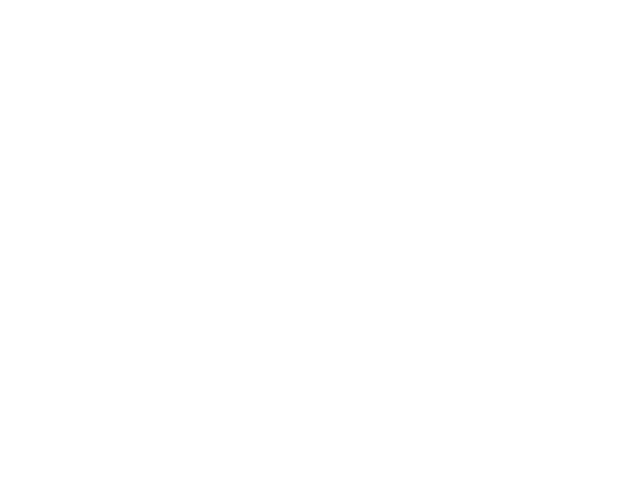

<IPython.core.display.Javascript object>


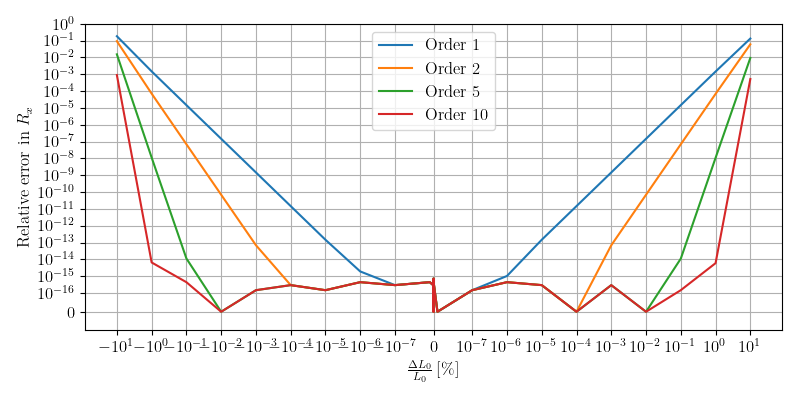

In [9]:
#ERROR Rx vs % Delta_L0  en ZOOM entre -1% y 1$

#Escoger parámetro "l","h","L_0","A_0","E","w","F","s"
p="L_0"
#Escoger funcion "Rx", "x_y"
func="Rx"
plt.figure()
error_graph(p,func,zoom=True,zoom_exp=-16,zoom_0_x=1e-7,legend="upper center",figsize=(8,4))

plt.savefig("Error_taylor"+p+"_zoom.pdf")
plt.show()

<IPython.core.display.Javascript object>


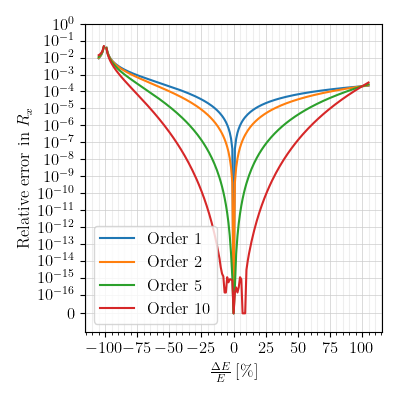

In [8]:
#ERROR Rx vs % Delta_E entre -100% y 100%

#Escoger parámetro "l","h","L_0","A_0","E","w","F","s"
p="E"
#Escoger funcion "Rx", "x_y"
func="Rx"

error_graph(p,func,porc_max=106,paso=1,xmult=[25,5])
plt.savefig("Error_taylor"+p+".pdf")

<IPython.core.display.Javascript object>


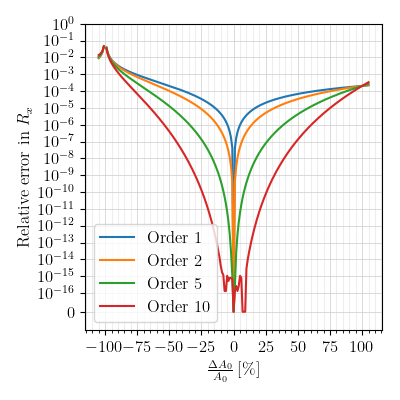

In [9]:
#ERROR Rx vs % Delta_A0 entre -100% y 100%

#Escoger parámetro "l","h","L_0","A_0","E","w","F","s"
p="A_0"
#Escoger funcion "Rx", "x_y"
func="Rx"
error_graph(p,func,porc_max=106,paso=1,xmult=[25,5])
plt.savefig("Error_taylor"+p+".pdf")

<IPython.core.display.Javascript object>


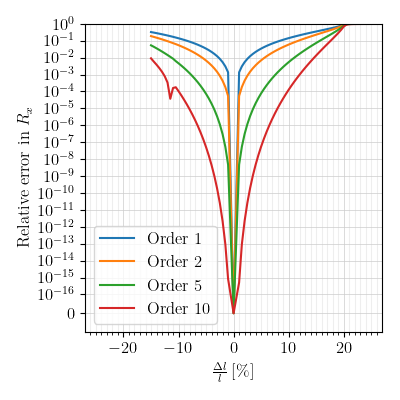

No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.


In [10]:
#ERROR Rx vs % Delta_l entre -20% y 20%

#Escoger parámetro "l","h","L_0","A_0","E","w","F","s"
p="l"
#Escoger funcion "Rx", "x_y"
func="Rx"
error_graph(p,func,porc_max=25,paso=0.5,xmult=[10,1])
plt.savefig("Error_taylor"+p+".pdf")

<IPython.core.display.Javascript object>


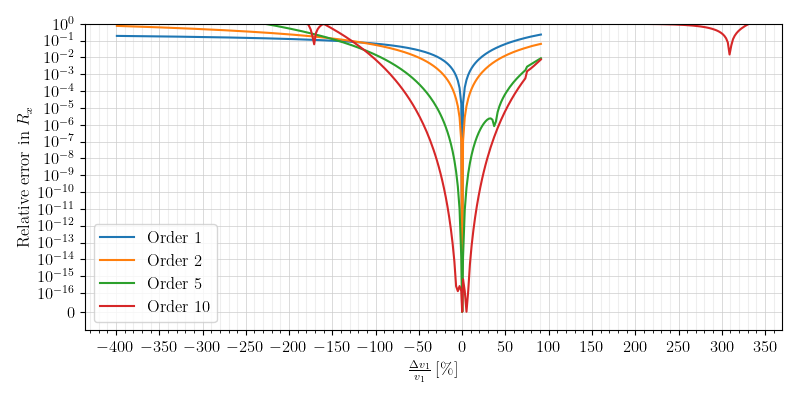

No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.


In [8]:
#ERROR Rx vs % Delta_F entre -100% y 100%

#Escoger parámetro "l","h","L_0","A_0","E","w","F","s"
p="v_1"
#Escoger funcion "Rx", "x_y"
func="Rx"
error_graph(p,func,porc_max=400,paso=2,xmult=[50,10],figsize=(8,4))
plt.savefig("Error_taylor"+p+".pdf")

<IPython.core.display.Javascript object>


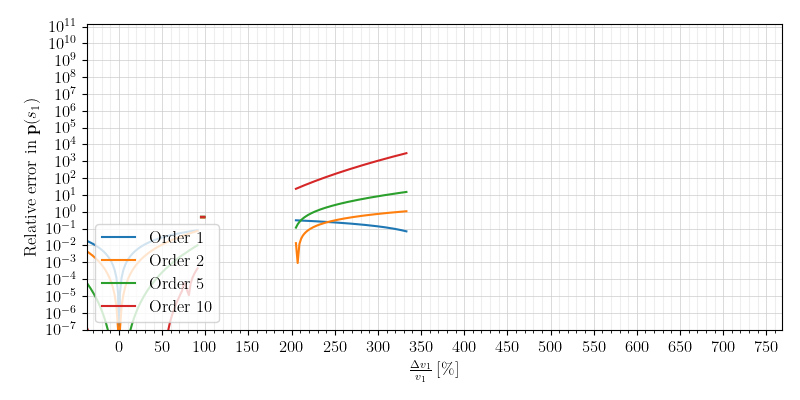

No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.
No converge. 50 it.


In [7]:
#ERROR x_y vs % Delta_F entre -100% y 100%

#Escoger parámetro "l","h","L_0","A_0","E","w","F","s"
p="v_1"
#Escoger funcion "Rx", "x_y"
func="x_y"
error_graph(p,func,porc_max=400,paso=2, xmult=[50,10],figsize=(8,4))
plt.savefig("Error_taylor"+p+"_x_y.pdf")

In [28]:
#Lectura de datos de entrada
nbases = 1
order = 2
l,h,L0,A0,E,w,cargas = cab.leer_entradas("Irvine_0")
cargas = cargas.astype(object)
F = cargas[0][0]
s = cargas[0][1]

#Pertubar parametros 
e1 = oti.e(1,nbases=nbases, order=order)
F = F + e1
cargas[0][0] = F

xy = x_y(l,h,L0,A0,E,w,F,s,cargas,order,nbases)
x = (xy[0,0]*L0).get_deriv(0)
y = (xy[1,0]*L0).get_deriv(0)
print(x)
print(y)

0.2916023863208234
0.2644254467547399


In [29]:
print(A)

NameError: name 'A' is not defined